In [33]:
import numpy as np
import pandas as pd
import os
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance

In [34]:
path = 'train.csv'
path1 = 'unique_m.csv'
Dataset1 = pd.read_csv(path)
Dataset2 = pd.read_csv(path1).drop(['critical_temp', 'material'], axis = 1)

dataFrame = pd.concat([Dataset1, Dataset2], axis = 1)

In [35]:
dataFrame.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [36]:
# 删除一切相关联的特征,进行抽象
correlationMatrix = dataFrame.corr()
correlationFeatures = set()

for i in range(len(correlationMatrix)) :
    for j in range(i) :
        if abs(correlationMatrix.iloc[i, j]) > 0.75 :
            colname = correlationMatrix.columns[i]
            if colname != "critical_temp" :
                correlationFeatures.add(colname)
dataFrame.drop(correlationFeatures, axis = 1, inplace = True)
dataFrame.head(5)

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,range_Density,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,122.90607,31.794921,775.425,1010.268571,735.985714,160.25,42.914286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,122.90607,36.161939,766.440,1010.612857,743.164286,161.20,50.571429,10488.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,122.90607,35.741099,775.425,1010.820000,743.164286,160.25,49.314286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,122.90607,33.768010,775.425,1010.544286,739.575000,160.25,46.114286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,122.90607,27.848743,775.425,1009.717143,728.807143,160.25,36.514286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [37]:
# 把方差低的特征剔除
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
selector.fit(dataFrame)
dataFrame = pd.DataFrame(selector.transform(dataFrame), columns = dataFrame.columns[selector.get_support()])
dataFrame.shape

(21263, 63)

In [38]:
dataFrame.to_csv('CleanData.csv')

In [39]:
sc = StandardScaler()

df = pd.read_csv('CleanData.csv')
x = df.drop('critical_temp', axis = 1)
x_scale = sc.fit_transform(x)
x = pd.DataFrame(x_scale, columns = x.columns)
y = df['critical_temp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [40]:
df.head()

,Unnamed: 0,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,...,Sb,Te,Ba,La,Pr,Ta,Re,Ir,Au,Bi
0,0,4.0,88.944468,122.90607,31.794921,775.425,1010.268571,735.985714,160.25,42.914286,...,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.0,92.729214,122.90607,36.161939,766.440,1010.612857,743.164286,161.20,50.571429,...,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4.0,88.944468,122.90607,35.741099,775.425,1010.820000,743.164286,160.25,49.314286,...,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.0,88.944468,122.90607,33.768010,775.425,1010.544286,739.575000,160.25,46.114286,...,0.0,0.0,0.15,1.85,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,88.944468,122.90607,27.848743,775.425,1009.717143,728.807143,160.25,36.514286,...,0.0,0.0,0.30,1.70,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
reg = XGBR(n_estimators=682,
           max_depth = 9,
           eta = 0.08432,
          ).fit(x_train,y_train)
y_prediction = pd.Series(reg.predict(x_test))
min_rmse = round(np.sqrt(mean_squared_error(y_test, y_prediction)), 4)
r2 = round(r2_score(y_prediction, y_test), 4)

print(r2)
print(min_rmse)

0.9346
8.445


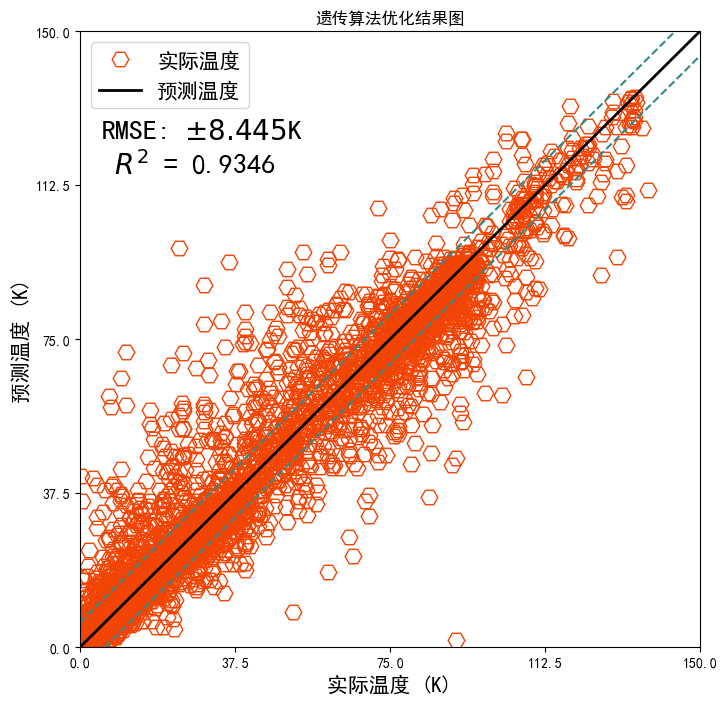

In [42]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.figure(1, figsize=(8, 8))
plt.plot(y_test, y_prediction, color='#F24405',marker='H',ls='', markersize = 12, mfc = 'none')
plt.plot([0, 150], [0, 150], 'k', linewidth = 2)
plt.plot([0, 150], [6, 156], color='#348888', ls ='--', linewidth = 1.5)
plt.plot([6, 150], [0, 144], color='#348888', ls ='--', linewidth = 1.5)
plt.xlabel('实际温度 (K)', fontsize = 15)
plt.ylabel('预测温度 (K)', fontsize = 15)
plt.xlim((0, 150))
plt.ylim((0, 150))
ticks = np.linspace(0, 150, 5)
text = r'$\pm' + str(min_rmse) + '$' + 'K \n $R^2$ = ' + str(r2)
plt.text(5, 115, 'RMSE: ' + text, fontsize = 20)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['实际温度', '预测温度'], loc = 'best', fontsize = 15)
plt.title('遗传算法优化结果图')
plt.savefig('figure1')

In [43]:
reg = XGBR(n_estimators=988,
           max_depth = 8,
           eta = 0.1147869172,
          ).fit(x_train,y_train)
y_prediction = pd.Series(reg.predict(x_test))
min_rmse = round(np.sqrt(mean_squared_error(y_test, y_prediction)), 4)
r2 = round(r2_score(y_prediction, y_test), 4)

print(r2)
print(min_rmse)

0.9353
8.4193


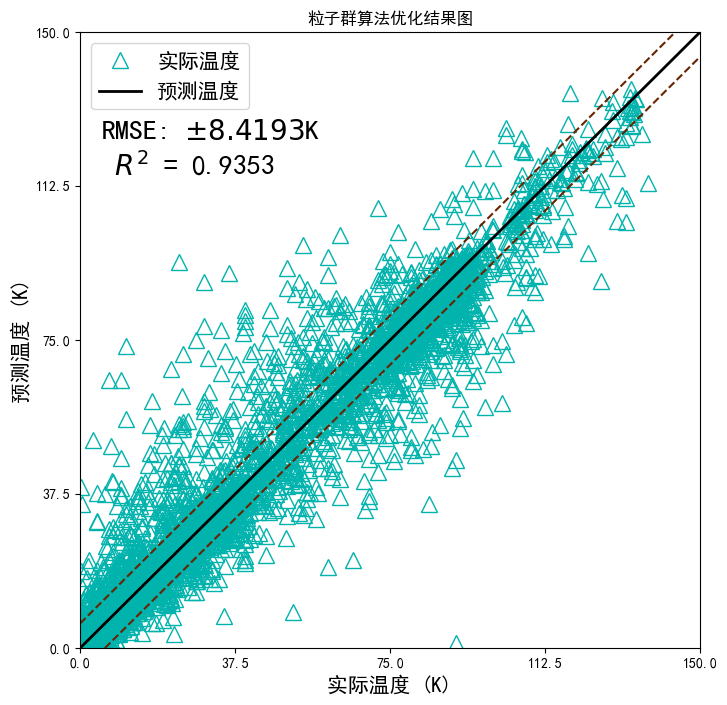

In [44]:
plt.figure(1, figsize=(8, 8))
plt.plot(y_test, y_prediction, color='#00B3AD',marker='^',ls='', markersize = 12, mfc = 'none')
plt.plot([0, 150], [0, 150], 'k', linewidth = 2)
plt.plot([0, 150], [6, 156], color='#662400', ls ='--', linewidth = 1.5)
plt.plot([6, 150], [0, 144], color='#662400', ls ='--', linewidth = 1.5)
plt.xlabel('实际温度 (K)', fontsize = 15)
plt.ylabel('预测温度 (K)', fontsize = 15)
plt.xlim((0, 150))
plt.ylim((0, 150))
ticks = np.linspace(0, 150, 5)
text = r'$\pm' + str(min_rmse) + '$' + 'K \n $R^2$ = ' + str(r2)
plt.text(5, 115, 'RMSE: ' + text, fontsize = 20)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['实际温度', '预测温度'], loc = 'best', fontsize = 15)
plt.title('粒子群算法优化结果图')
plt.savefig('figure2')

In [45]:
import numpy as np
 
from PIL import Image
 
paths = ['figure1.png', 'figure2.png']
img_array = ''
img = ''
for i, v in enumerate(paths):
    if i == 0:
        img = Image.open(v)  # 打开图片
        img_array = np.array(img)  # 转化为np array对象
    if i > 0:
        img_array2 = np.array(Image.open(v))
        img_array = np.concatenate((img_array, img_array2), axis=1)  # 横向拼接
        # img_array = np.concatenate((img_array, img_array2), axis=0)  # 纵向拼接
        img = Image.fromarray(img_array)
 
 
 
# 保存图片
img.save('test.png')